## Importing dependencies

In [8]:
from fastai.vision.all import *
from tkinter import filedialog
from time import sleep
from PIL import Image

# Train

In [9]:
# defizione classe di insetti che il modello deve riconoscere
searches = 'lucila', 'mosca domestica', 'piofila'
path = filedialog.askdirectory(title="Seleziona una cartella")

# verifica integrità delle immagini, solo se possono essere aperte e non hanno altri problemi che invalidano
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)  # se non passa vengono rimosse
total_images = len(get_image_files(path))
valid_images = total_images - len(failed)
# numero di immagini non valide
print("fallite:", len(failed), "riuscite:", valid_images)

fallite: 0 riuscite: 737


In [10]:
# Data Augmentation

item_tfms = [ Resize((192, 192), method='squish')] #applica una trasformazione di ridimensionamento alle immagini
 
batch_tfms = aug_transforms() #applica trasformazioni di Data Augmentation ad un batch di immagini

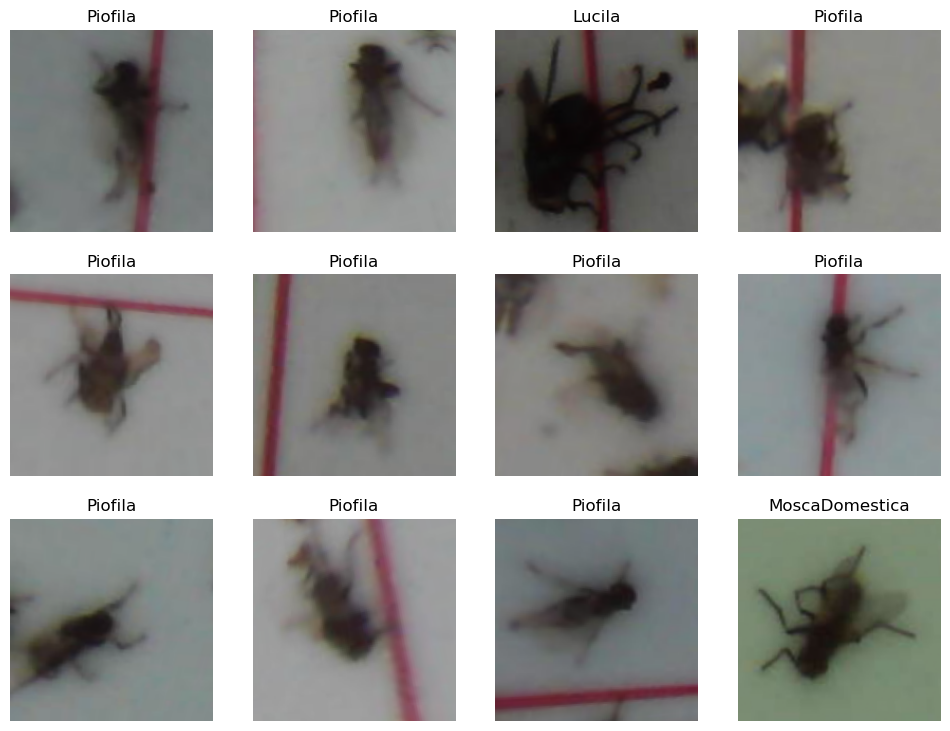

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), #specifica che stiamo lavorando in blocchi di immagini e categorie
    get_items=get_image_files, #indica come ottenere elengo immagini nella directory specificata
    splitter=RandomSplitter(valid_pct=0.3, seed=42), #divide casualmente il dataset in set di addestramento e e di validazione (20%)
    get_y=parent_label, #determina come ottenere le etichette dai percorsi dei file 
    item_tfms=item_tfms, #trasformazioni sulle singole immagini
    batch_tfms=batch_tfms, #trasformazioni al batch di immagini
).dataloaders(path, bs=32) #creazione degli oggetti dataloaders con il datablock precedente, bs dimensione del batch (paralellizzazione del batch su GPU)

dls.show_batch(max_n=12)

In [12]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.path = Path(".\learner")
learn.model_dir = Path(".\models")
learn.fine_tune(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.362923,0.418219,0.167421,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.406241,0.211798,0.081448,00:02
1,0.258299,0.111325,0.031674,00:02
2,0.168113,0.117153,0.031674,00:02
3,0.121348,0.066700,0.022624,00:02
4,0.086626,0.079349,0.022624,00:02
5,0.065098,0.079446,0.018100,00:02
6,0.051307,0.068519,0.018100,00:02


In [13]:
learn.save('insectaCam_weights') #salva i pesi della rete allenata 
learn.export('insectaCamModel.pkl') #salva tutto il modello

# Test

In [14]:
from PIL import Image

# Definisci il percorso dell'immagine
image_path = filedialog.askopenfilename(title="Seleziona una cartella")

# Esegui la previsione
is_mosquito, _, probs = learn.predict(PILImage.create(image_path))

# Stampa le probabilità per ogni classe
print(f"Probability for Lucila: {probs[0]:.4f}")
print(f"Probability for Mosca Domestica: {probs[1]:.4f}")
print(f"Probability for Piofila: {probs[2]:.4f}")


Probability for Lucila: 0.0000
Probability for Mosca Domestica: 0.0001
Probability for Piofila: 0.9999
